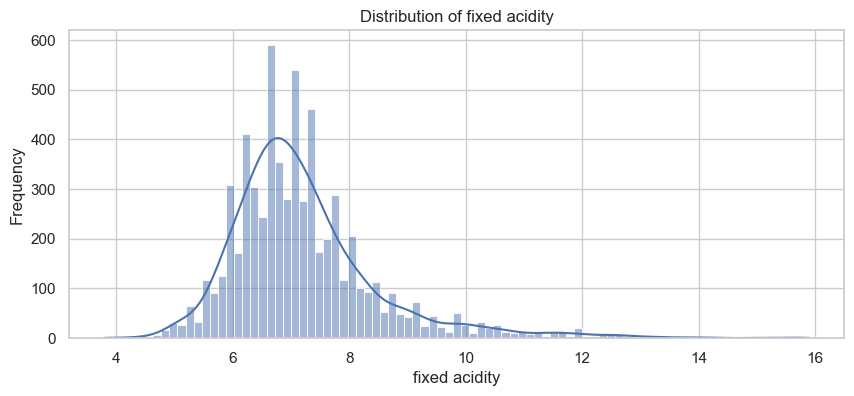

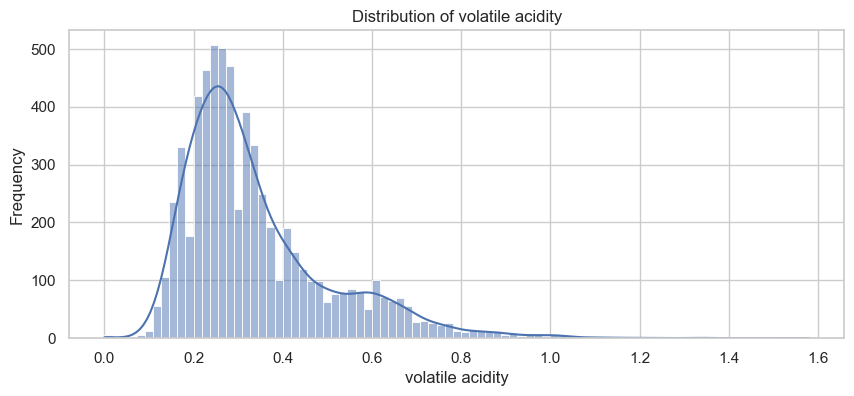

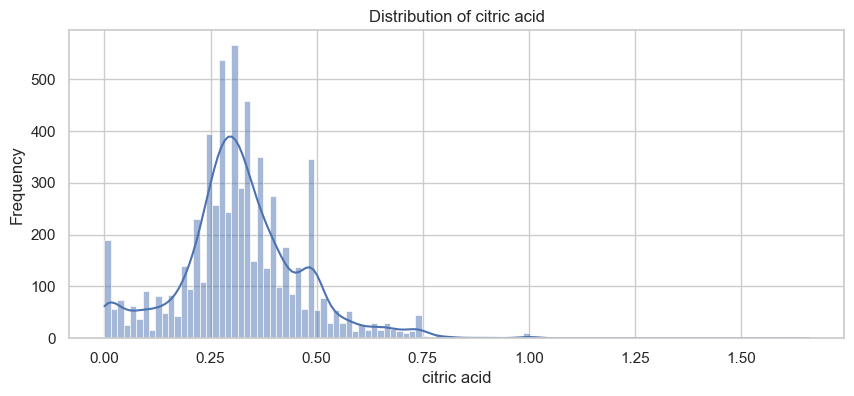

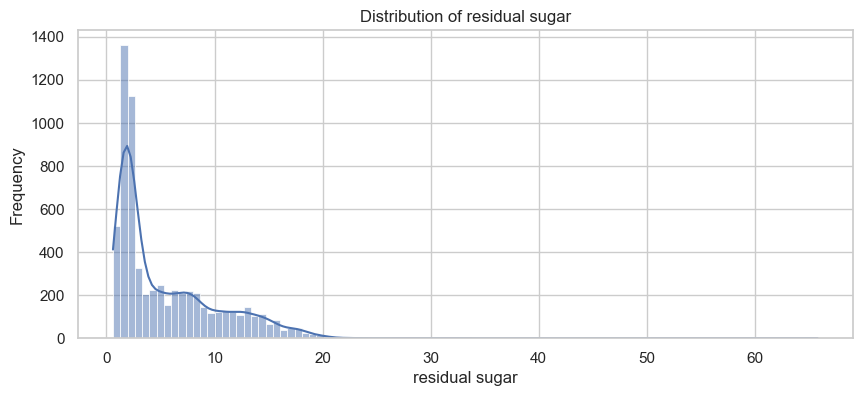

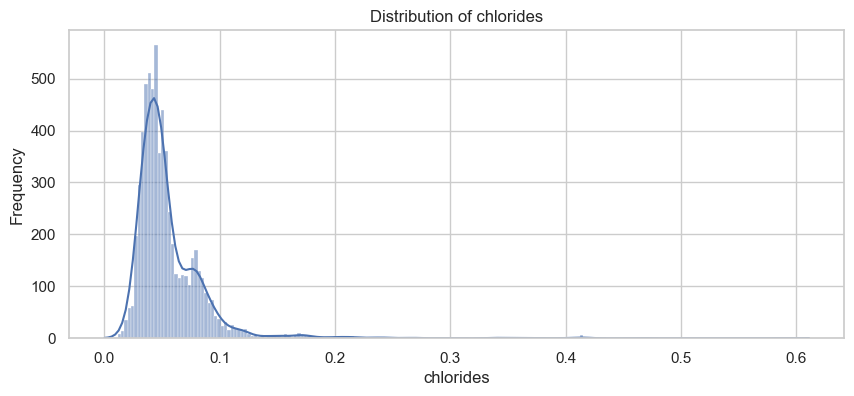

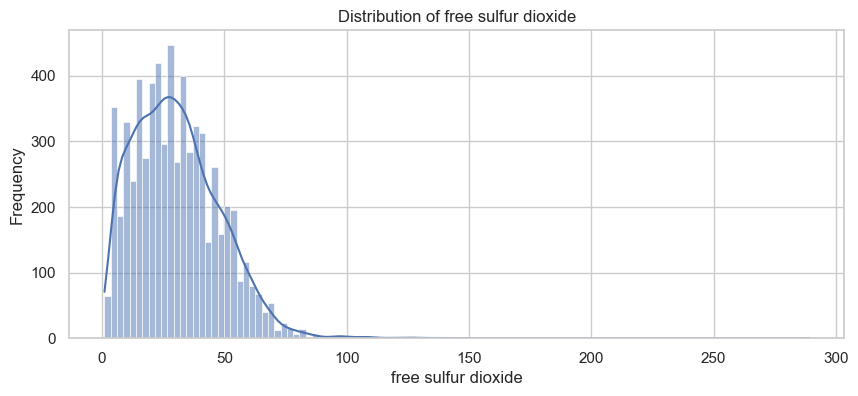

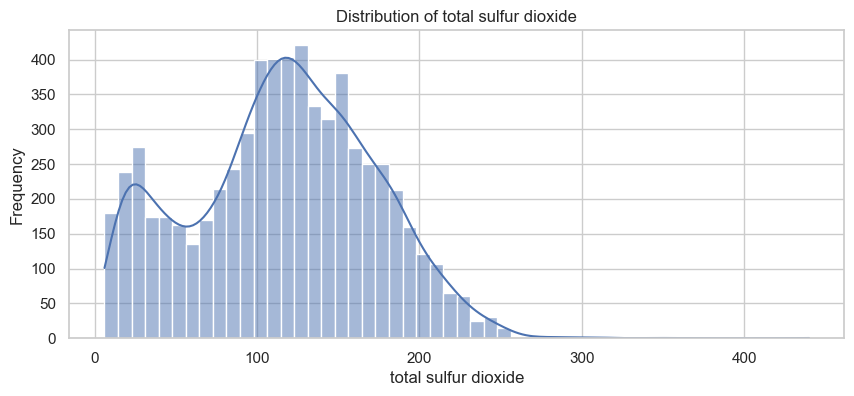

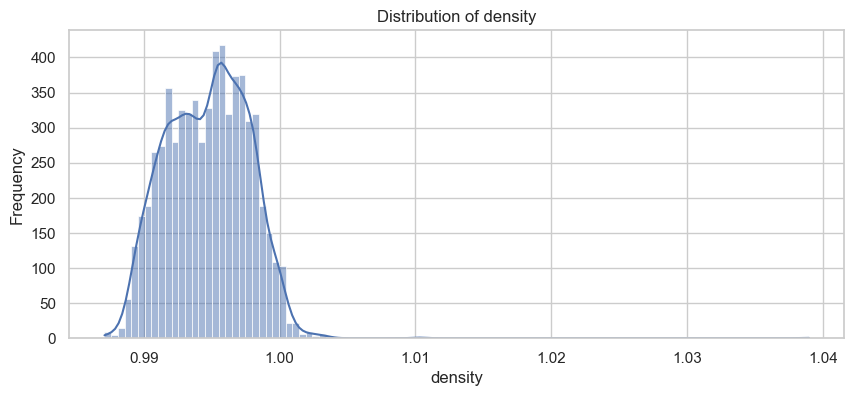

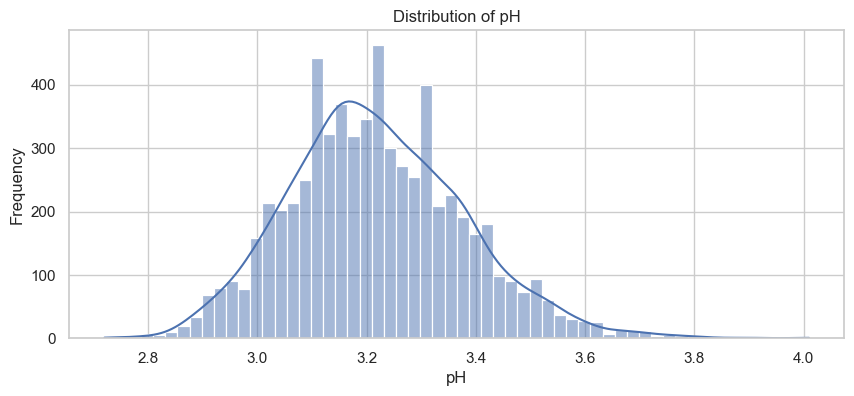

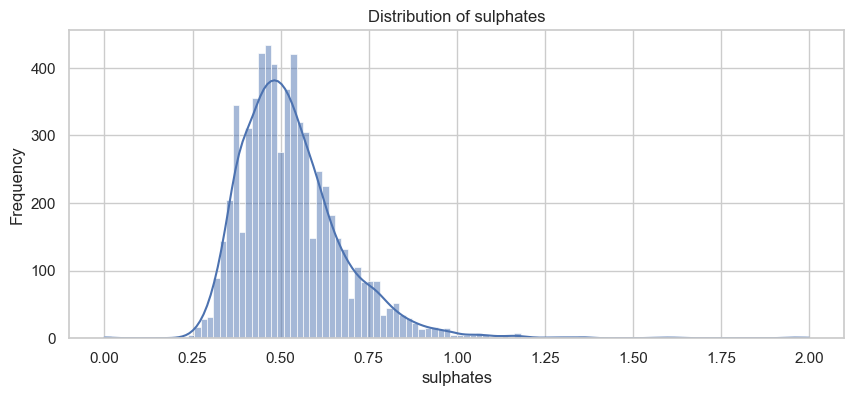

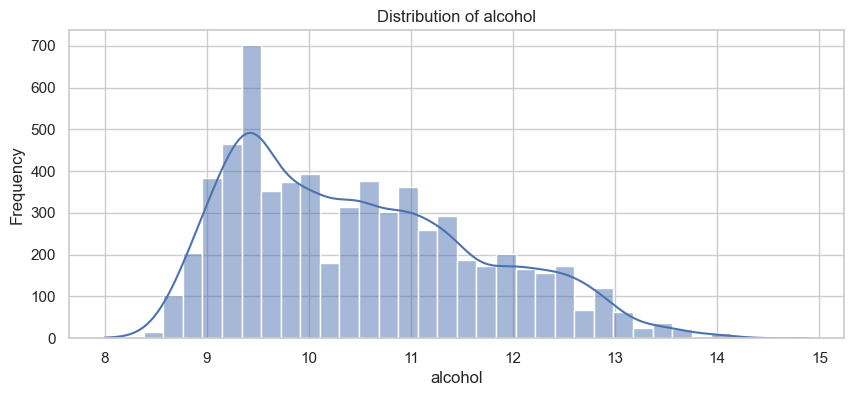

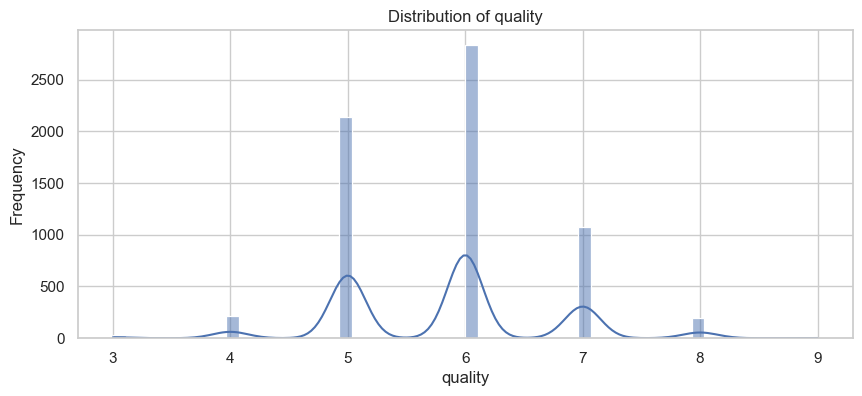

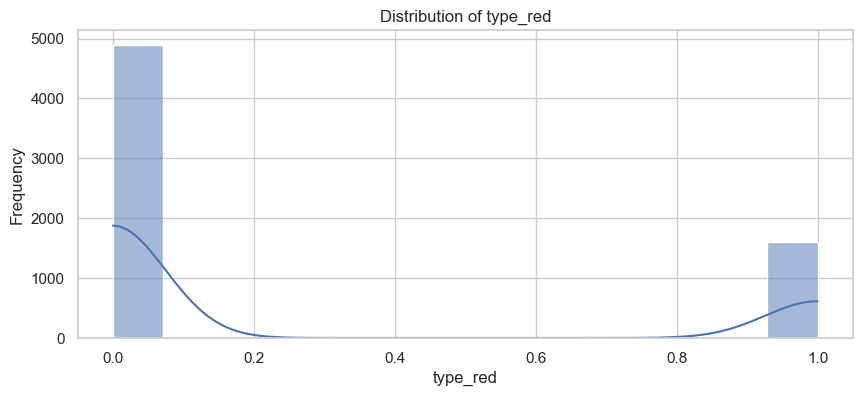

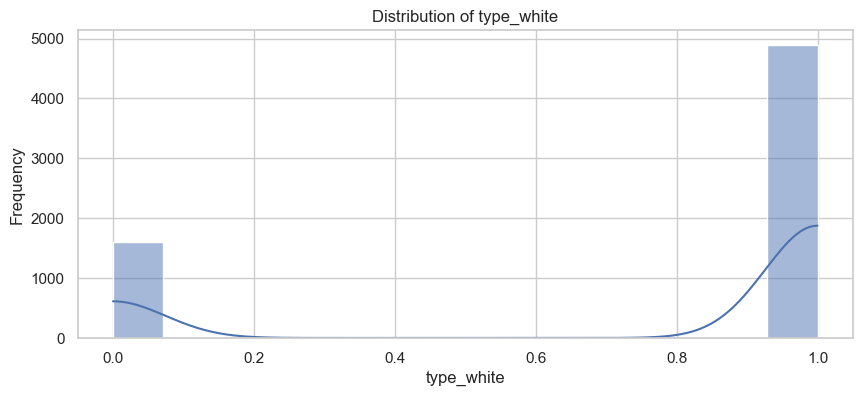

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load your dataset here
# For demonstration, let's assume wine_data is your DataFrame
## PREPARE DATA ##
wine_df = pd.read_csv("../winequality.csv")

# Fill missing data with either random data or a category corresponding to "Unknown"
for column in wine_df.columns:
    if wine_df[column].isna().any() and pd.api.types.is_numeric_dtype(wine_df[column]):
        wine_df.loc[wine_df[column].isna(), column] = [i for i in np.random.choice(range(round(wine_df[column].min()), round(wine_df[column]. max())), wine_df[column].isna().sum())]
    elif wine_df[column].isna().any() and (pd.api.types.is_object_dtype(wine_df[column]) or pd.api.types.is_categorical_dtype(wine_df[column])):
        wine_df[column].fillna("Unknown")

# One-hot encode wine type
for column in wine_df.columns:
    if pd.api.types.is_categorical_dtype(wine_df[column]) or pd.api.types.is_object_dtype(wine_df[column]):
        one_hot = pd.get_dummies(wine_df[column], prefix=column)
        wine_df = wine_df.drop(column, axis = 1)
        wine_df = wine_df.join(one_hot)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate over each column to create a separate plot
for column in wine_df.columns:
    plt.figure(figsize=(10, 4))  # Adjust the size of the plot
    sns.histplot(wine_df[column], kde=True)  # Histogram with density plot (KDE)
    
    plt.title(f'Distribution of {column}')  # Set title
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.show()